In [16]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [17]:
# XGBoost: Forward Selection
games = pd.read_csv('./Dataset/Cleaned/cleaned_games_offset_total.csv')

forward_selected_list = np.sort(['FW_on-target', 'FW_time on opposite half', 'GK_distance in poss', 'GK_low activity',
                         'DF_avg max speed', 'DF_red', 'FW_total passes', 'MF_on-target', 'GK_total passes',
                         'DF_on-target', 'MF_red', 'MF_fouls suffered', 'MF_passes accuracy', 'FW_fouls suffered',
                         'FW_low activity', 'FW_distance not in poss', 'FW_sprints', 'GK_passes_succeed', 'GK_saves',
                         'GK_yellow', 'GK_time on opposite third', 'DF_yellow', 'MF_tackles suffered losing ball',
                         'GK_fouls suffered', 'FW_distance', 'DF_total passes', 'DF_distance in poss',
                         'DF_tackles suffered losing ball', 'MF_tackles gaining ball', 'GK_avg max speed',
                         'MF_time on opposite pen', 'MF_time on opposite third', 'MF_time on opposite half', 'FW_total shots'])

X = games[forward_selected_list]
y = games["result"]

# transform y value so that it can start with 0
# 0: lose, 1: draw, 2: win
le = LabelEncoder()
y = le.fit_transform(y)


In [18]:
# split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standardize
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = XGBClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 4)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [20]:
# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.07%


In [21]:
def show_confusion_matrix(matrix, target, accuracy_score):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(5,5))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

    matrix = matrix.astype('float')/matrix.sum(axis=1)[:,np.newaxis]

    N, D = matrix.shape
    for n in range(N):
      for d in range(D):
        plt.text(d, n, "{:0.4f}".format(matrix[n, d]), horizontalalignment="center")

    plt.xlabel('Predicted\naccuracy={:0.2f}'.format(accuracy_score))
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks(np.arange(3), target, fontsize=12)
    plt.yticks(np.arange(3), target, fontsize=12)
    plt.show()

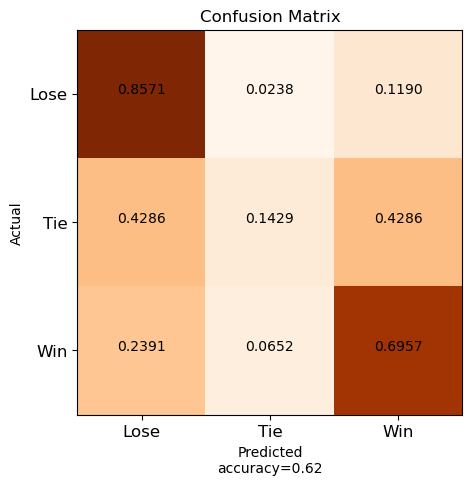

In [22]:
show_confusion_matrix(confusion_matrix(y_test, y_pred), ['Lose', 'Tie', 'Win'], accuracy_score(y_test, y_pred))

In [23]:
# XGBoost: Backward Elimination
backward_selected_list = np.sort(['GK_total passes', 'GK_fouls suffered', 'GK_avg max speed', 'GK_low activity',
                                  'GK_mid activity', 'GK_high activity', 'GK_yellow', 'DF_passes_succeed', 'DF_total passes',
                                  'DF_passes accuracy', 'DF_on-target', 'DF_fouls suffered', 'DF_distance', 'DF_distance in poss',
                                  'DF_avg max speed', 'DF_low activity', 'DF_mid activity', 'DF_high activity', 'DF_red',
                                  'DF_tackles suffered losing ball', 'MF_passes_succeed', 'MF_total passes', 'MF_passes accuracy',
                                  'MF_total shots', 'MF_on-target', 'MF_time on opposite half', 'MF_time on opposite third',
                                  'MF_time on opposite pen', 'MF_avg max speed', 'MF_tackles gaining ball', 'FW_total passes',
                                  'FW_total shots', 'FW_on-target', 'FW_fouls committed', 'FW_fouls suffered', 'FW_time on opposite half',
                                  'FW_time on opposite third', 'FW_low activity', 'FW_saves', 'FW_yellow'])
X = games[backward_selected_list]
y = games["result"]


# transform y value so that it can start with 0
# 0: lose, 1: draw, 2: win
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
# split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standardize
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = XGBClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 4)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [26]:
# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [14]:
def show_confusion_matrix(matrix, target, accuracy_score):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(5,5))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

    matrix = matrix.astype('float')/matrix.sum(axis=1)[:,np.newaxis]

    N, D = matrix.shape
    for n in range(N):
      for d in range(D):
        plt.text(d, n, "{:0.4f}".format(matrix[n, d]), horizontalalignment="center")

    plt.xlabel('Predicted\naccuracy={:0.2f}'.format(accuracy_score))
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks(np.arange(3), target, fontsize=12)
    plt.yticks(np.arange(3), target, fontsize=12)
    plt.show()

In [15]:
show_confusion_matrix(confusion_matrix(y_test, y_pred), ['Lose', 'Tie', 'Win'], accuracy_score(y_test, y_pred))

NameError: name 'confusion_matrix' is not defined